In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

advanced_features = pd.read_csv('basketball_csvs/advanced_features.csv')
winners = pd.read_csv('basketball_csvs/Champions.csv')

In [2]:
advanced_features.head()

,Year,Team,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,...,Pace_Average,Pace_Differential,Possessions_Differential,Rank,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,Position
0,1986,Atlanta Hawks,17.270312,0.591152,9.24,0.665909,98.99520,99.13344,0.348624,98.449014,...,100.77809,-2.329076,-0.13824,4,0.610,2.59,108.76,106.19,2.57,4
1,1986,Boston Celtics,19.801845,0.805120,8.96,0.716418,100.75776,100.62336,0.313107,99.817160,...,100.77809,-0.960930,0.13440,1,0.817,9.06,112.54,103.67,8.87,1
2,1986,Chicago Bulls,17.070792,0.362645,7.31,0.673123,99.28320,99.24480,0.351351,98.402974,...,100.77809,-2.375116,0.03840,20,0.366,-3.12,109.95,113.06,-3.11,5
3,1986,Dallas Mavericks,17.838798,0.539461,2.20,0.667411,101.24928,101.28000,0.300000,100.635667,...,100.77809,-0.142423,-0.03072,8,0.537,0.70,112.45,111.59,0.86,4
4,1986,Denver Nuggets,17.241379,0.546840,2.52,0.641723,105.96480,105.72672,0.309129,105.450321,...,100.77809,4.672231,0.23808,9,0.573,0.89,107.16,106.43,0.73,4


In [3]:
winners.head()

,Year,Team
0,1986,Boston Celtics
1,1987,Los Angeles Lakers
2,1988,Los Angeles Lakers
3,1989,Detroit Pistons
4,1990,Detroit Pistons


In [4]:
winners.index = winners['Year']
features = advanced_features.drop(['Rank', 'Position'], axis = 1)
features['winner'] = pd.Series([1 if winners['Team'].loc[features['Year'].loc[i]] == features['Team'].loc[i] else 0 for i in features.index])


In [5]:
features.head()

,Year,Team,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,...,Turnover_Ratio,Pace_Average,Pace_Differential,Possessions_Differential,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,winner
0,1986,Atlanta Hawks,17.270312,0.591152,9.24,0.665909,98.99520,99.13344,0.348624,98.449014,...,12.655573,100.77809,-2.329076,-0.13824,0.610,2.59,108.76,106.19,2.57,0
1,1986,Boston Celtics,19.801845,0.805120,8.96,0.716418,100.75776,100.62336,0.313107,99.817160,...,11.295898,100.77809,-0.960930,0.13440,0.817,9.06,112.54,103.67,8.87,1
2,1986,Chicago Bulls,17.070792,0.362645,7.31,0.673123,99.28320,99.24480,0.351351,98.402974,...,12.193423,100.77809,-2.375116,0.03840,0.366,-3.12,109.95,113.06,-3.11,0
3,1986,Dallas Mavericks,17.838798,0.539461,2.20,0.667411,101.24928,101.28000,0.300000,100.635667,...,10.897632,100.77809,-0.142423,-0.03072,0.537,0.70,112.45,111.59,0.86,0
4,1986,Denver Nuggets,17.241379,0.546840,2.52,0.641723,105.96480,105.72672,0.309129,105.450321,...,10.767605,100.77809,4.672231,0.23808,0.573,0.89,107.16,106.43,0.73,0


In [6]:
#features.index = features['Team']
teams = []
start = features.index[0]
for year in winners.index:
    team = pd.DataFrame()
    for i in features.index[start:]:
        row = features.loc[i]
        if row['Year'] == year:
            team = team.append(row)
        else:
            start = i
            break
    #team.index = team['Team']
    teams.append(team)


In [7]:


statscores = pd.DataFrame()
for k in teams:
    yr = k['Year'].iloc[0]
    te = k.drop(['Team'], axis = 1)
    wi = te[te['winner'] == 1].index[0]
    winning_stats = te.loc[wi]
    adjusted = pd.DataFrame(te.values - winning_stats.values, columns = te.columns, index = te.index).drop(wi, axis = 0)
    d = {stat: len(adjusted[stat][adjusted[stat] <= 0])/len(adjusted) for stat in adjusted}
    year_st = pd.DataFrame(d, index = [yr])
    #print(year_st)
    statscores = statscores.append(year_st)

In [8]:
statscores

,Assist_Ratio,DRtg/A,Defensive_Rebounding_Percentage,Efficiency_Differential,MOV/A,NRtg/A,ORtg/A,Offensive_Rebounding_Percentage,Pace,Pace_Average,Pace_Differential,Play_Percentage,Possessions_Differential,Possessions_game,Possessions_opp_game,Pythagorean_Winning_Percentage,Turnover_Ratio,W/L%,Year,winner
1986.0,0.933333,0.066667,1.000000,0.933333,1.000000,1.000000,0.933333,0.266667,0.266667,1.0,0.266667,0.933333,0.800000,0.266667,0.266667,1.000000,0.266667,1.000000,1.0,1.0
1987.0,0.928571,0.500000,0.357143,0.428571,1.000000,1.000000,1.000000,0.571429,0.785714,1.0,0.785714,1.000000,0.357143,0.714286,0.714286,1.000000,0.500000,1.000000,1.0,1.0
1988.0,0.857143,0.714286,0.714286,0.357143,0.857143,0.857143,0.928571,0.428571,0.571429,1.0,0.571429,0.928571,0.357143,0.571429,0.642857,0.928571,0.428571,1.000000,1.0,1.0
1989.0,0.428571,0.142857,0.857143,0.714286,0.785714,0.857143,0.571429,0.714286,0.000000,1.0,0.000000,0.642857,0.285714,0.000000,0.000000,0.785714,0.714286,1.000000,1.0,1.0
1990.0,0.266667,0.066667,0.800000,0.733333,0.800000,0.800000,0.466667,0.933333,0.066667,1.0,0.066667,0.666667,0.333333,0.000000,0.000000,0.866667,0.400000,0.933333,1.0,1.0
1991.0,0.928571,0.428571,0.571429,0.857143,1.000000,1.000000,1.000000,0.928571,0.357143,1.0,0.357143,1.000000,0.357143,0.214286,0.214286,1.000000,0.000000,0.928571,1.0,1.0
1992.0,0.857143,0.285714,0.785714,0.928571,1.000000,1.000000,1.000000,0.857143,0.214286,1.0,0.214286,1.000000,0.500000,0.214286,0.214286,1.000000,0.071429,1.000000,1.0,1.0
1993.0,0.714286,0.357143,0.428571,0.785714,0.857143,1.000000,0.928571,1.000000,0.000000,1.0,0.000000,1.000000,0.928571,0.000000,0.000000,0.928571,0.000000,0.857143,1.0,1.0
1994.0,0.785714,0.071429,0.714286,0.642857,0.714286,0.714286,0.142857,0.000000,0.571429,1.0,0.571429,0.071429,0.142857,0.571429,0.642857,0.714286,0.714286,1.000000,1.0,1.0
1995.0,0.642857,0.642857,0.071429,0.571429,0.357143,0.357143,0.642857,0.071429,0.642857,1.0,0.642857,0.285714,0.000000,0.571429,0.714286,0.357143,0.785714,0.428571,1.0,1.0


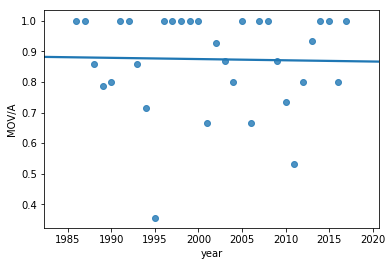

In [9]:
ax = sns.regplot(x = 'year', y= 'MOV/A', data = pd.DataFrame({'MOV/A': statscores['MOV/A'], 'year': statscores.index}), ci=0)
plt.show()

In [10]:
summary_stats = pd.DataFrame({'mean': statscores.mean(), 'variance': statscores.var()})
summary_stats.sort_values(by='mean', ascending=0)

,mean,variance
winner,1.000000,0.000000
Pace_Average,1.000000,0.000000
Year,1.000000,0.000000
W/L%,0.920982,0.015849
Pythagorean_Winning_Percentage,0.882589,0.027509
NRtg/A,0.880655,0.025682
MOV/A,0.873958,0.025467
Play_Percentage,0.777827,0.065964
ORtg/A,0.730506,0.055095
Assist_Ratio,0.676637,0.059886


In [11]:
summary_stats = summary_stats.drop(['Pace_Average', 'Year'])

In [12]:
results = pd.DataFrame()
stat_list = [i for i in summary_stats['mean'][summary_stats['mean'] > 0.85].index]
for k in range(len(teams)):
    test_team = teams[k][stat_list]
    
    df = pd.DataFrame({i: [max(test_team[i]),test_team[i][test_team[i] == max(test_team[i])].index[0]] for i in stat_list}, index = [str(k)+'_max', str(k)+'_index'])
    results = results.append(df)
        

In [13]:
results

,MOV/A,NRtg/A,Pythagorean_Winning_Percentage,W/L%,winner
0_max,9.06,8.87,0.805120,0.817,1.0
0_index,1.00,1.00,1.000000,1.000,1.0
1_max,8.32,7.86,0.795260,0.793,1.0
1_index,25.00,25.00,25.000000,25.000,25.0
2_max,6.15,6.23,0.706824,0.756,1.0
2_index,32.00,32.00,32.000000,39.000,39.0
3_max,7.95,7.95,0.767600,0.768,1.0
3_index,49.00,49.00,49.000000,51.000,51.0
4_max,7.09,7.03,0.741244,0.768,1.0
4_index,73.00,69.00,73.000000,69.000,66.0


In [32]:
#results[results['winner'] == results['MOV/A']]
results2 = pd.DataFrame()
#stat_list2 = stat_list.remove('winner')
for i in results.index:
    for st in stat_list:
        if results[st].loc[i] == results['winner'].loc[i]:
            results2 = results2.append(results.loc[i])
            break
    

In [33]:
results2

,MOV/A,NRtg/A,Pythagorean_Winning_Percentage,W/L%,winner
0_index,1.0,1.0,1.0,1.0,1.0
1_index,25.0,25.0,25.0,25.0,25.0
2_index,32.0,32.0,32.0,39.0,39.0
3_index,49.0,49.0,49.0,51.0,51.0
5_index,79.0,79.0,79.0,89.0,79.0
6_index,93.0,93.0,93.0,93.0,93.0
7_index,111.0,110.0,117.0,118.0,110.0
8_index,131.0,131.0,131.0,127.0,127.0
10_index,153.0,153.0,153.0,153.0,153.0
11_index,169.0,169.0,169.0,169.0,169.0


In [35]:
results.to_csv("stats_and_wins.csv")

In [34]:
len(results2)/len(teams)

0.625